# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns

# Read the file.csv

In [2]:
df=pd.read_csv(r'D:\Data sets for AI\Student_Performance.csv') # to read the dataset

In [3]:
# show the dimensions of the data set 
df.shape

(10000, 6)

In [4]:
# privew the first 5 rows of the data
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Data Preprocessing

In [5]:
df.nunique() # to get the number of unuique value in your dataset

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [6]:
def min_and_max(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
df.apply(min_and_max)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
min,1,40,No,4,0,10.0
max,9,99,Yes,9,9,100.0


In [7]:
df.isnull().sum() # to get the count of the null values in your dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# E D A

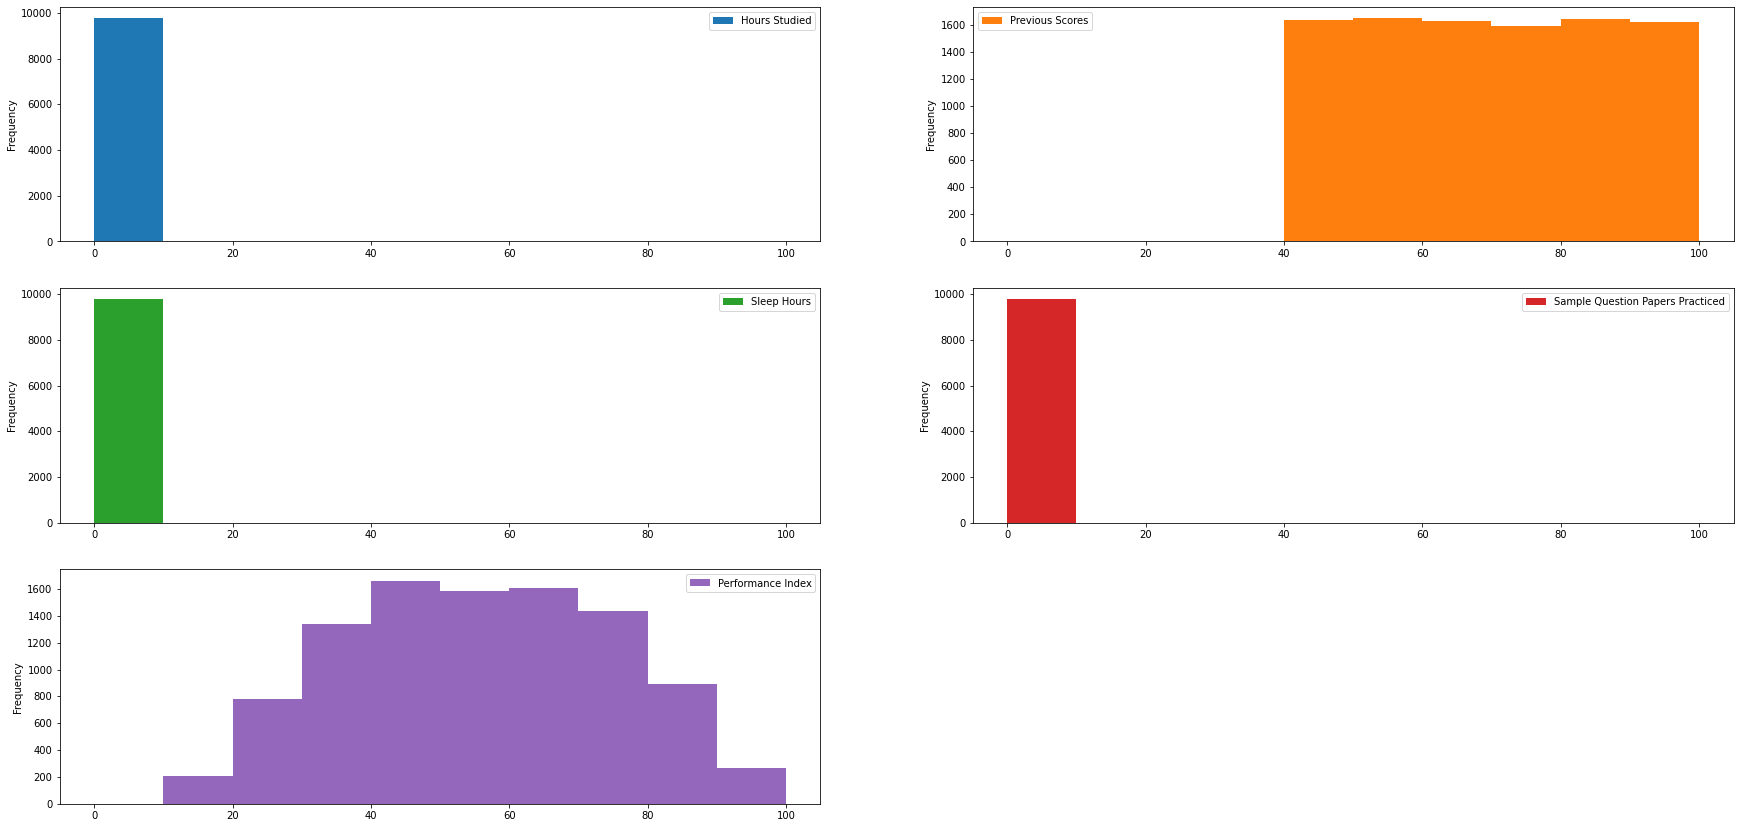

In [38]:
# plot histograms of the variables
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [9]:
df.drop(['Extracurricular Activities'],axis=1,inplace=True)

In [10]:
correlation=df.corr()

In [11]:
correlation['Performance Index'].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Name: Performance Index, dtype: float64

# correlation and heat map

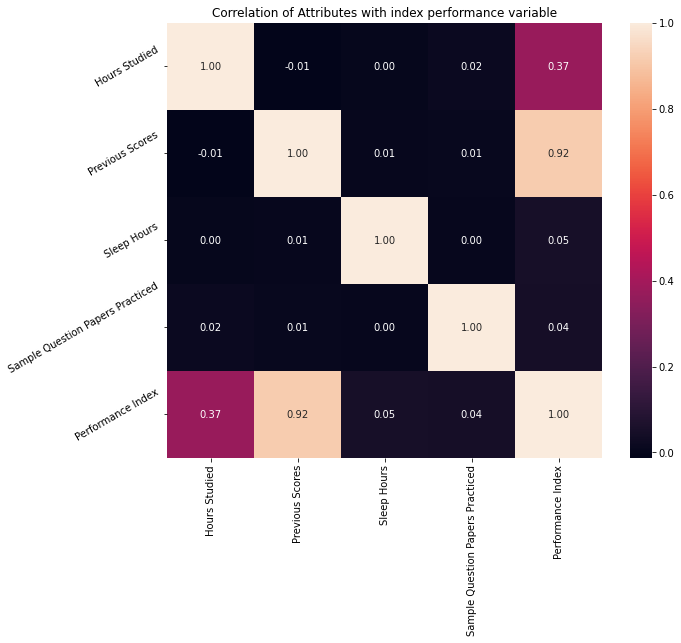

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with index performance variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
df=df.drop_duplicates() # to remove the duplicated values

# Split the data to x and y

In [14]:
x=df.loc[:,['Previous Scores','Hours Studied','Sleep Hours']].values # this is the independent variable 
y=df.iloc[:,-1].values # and this is the dependent variable 

In [15]:
x

array([[99,  7,  9],
       [82,  4,  4],
       [51,  8,  7],
       ...,
       [83,  6,  8],
       [97,  9,  7],
       [74,  7,  8]], shape=(9766, 3))

# Split the data to train and test

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #to split the data to train and test

In [17]:
x_test

array([[42,  4,  6],
       [66,  5,  6],
       [82,  3,  8],
       ...,
       [92,  5,  8],
       [79,  9,  8],
       [95,  4,  5]], shape=(1954, 3))

# Scaling the data 

In [18]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train) # to scaling the x_train
x_test_scaled=sc.transform(x_test)# to scaling the x_test

# Model Building

In [19]:
model=LinearRegression()
model.fit(x_train_scaled,y_train) #fit the x_train after scaling to the y_train

LinearRegression()

In [20]:
y_pred=model.predict(x_test_scaled) # predict the x_test after scaling 
y_pred2=model.predict(x_train_scaled) #predict the x_train after scaling

In [21]:
y_pred

array([24.15126387, 51.46647718, 63.00330097, ..., 78.91675484,
       77.12102835, 77.6713935 ], shape=(1954,))

In [22]:
y_test

array([27., 51., 63., ..., 79., 82., 79.], shape=(1954,))

# Evaluate The model and check overfitting 

In [23]:
accuracy_of_testing=r2_score(y_test,y_pred) # the accuracy of the testing data 
accuracy_of_training=r2_score(y_train,y_pred2) #the accuracy of the training data

In [35]:
print(f'the accuracy of testing : {accuracy_of_testing}')

the accuracy of testing : 0.9879397171653225


In [36]:
print(f'the accuracy of training : {accuracy_of_training}')

the accuracy of training : 0.9874136131686752


In [37]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits for better generalization
scores = cross_val_score(model, x_test,y_test, cv=cv, scoring='r2')  # Using R² score for evaluation

print(f'R² scores for each fold: {scores}')
print(f'Average R² score: {np.mean(scores):.4f}')


R² scores for each fold: [0.98801553 0.98550386 0.98902938 0.98910554 0.98746383]
Average R² score: 0.9878


# Visualize the comparison between the estimated_value and test_value

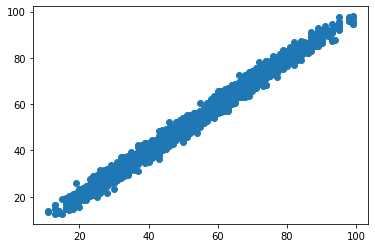

In [26]:
plt.scatter(y_test,y_pred);# the comparison betweeb the y_test and y_predict